In [1]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [2]:
# Load & preprocess MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize & reshape for CNN input
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]  # shape becomes (batch, 28, 28, 1)
x_test = x_test[..., tf.newaxis]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:

# CNN Model Definition
def create_cnn_model():
    inputs = layers.Input(shape=(28, 28, 1))

    # Conv Block 1
    x = layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # Conv Block 2
    x = layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # Conv Block 3
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)


In [4]:

# Instantiate model
cnn_model = create_cnn_model()

# Compile
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [5]:

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train
history_cnn = cnn_model.fit(x_train, y_train,
                            validation_split=0.2,
                            epochs=50,
                            batch_size=128,
                            callbacks=[early_stop, lr_schedule],
                            verbose=1)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 120ms/step - accuracy: 0.5233 - loss: 1.8767 - val_accuracy: 0.8871 - val_loss: 0.8019 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.9444 - loss: 0.5088 - val_accuracy: 0.9849 - val_loss: 0.3082 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.9656 - loss: 0.3563 - val_accuracy: 0.9868 - val_loss: 0.2419 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 124ms/step - accuracy: 0.9733 - loss: 0.2774 - val_accuracy: 0.9822 - val_loss: 0.2144 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 126ms/step - accuracy: 0.9742 - loss: 0.2353 - val_accuracy: 0.9798 - val_loss: 0.2030 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 124ms/step - accuracy: 0.9769 - loss: 0.2110 - val_accuracy: 0.9804 - val_loss: 0.1843 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.9

In [ ]:
# Evaluate
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


Final Test Accuracy: 0.9954


In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

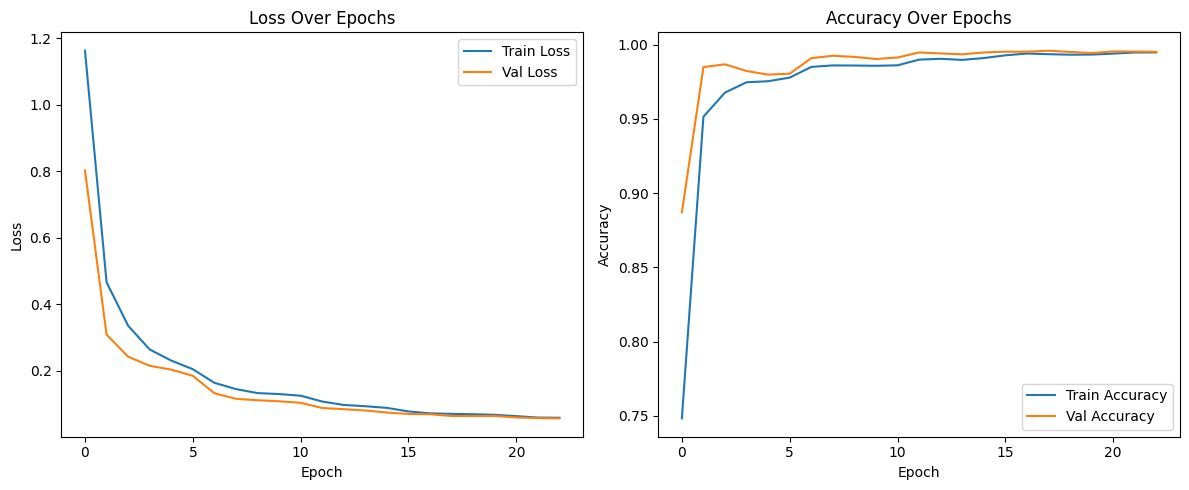

In [10]:
plot_training_history(history_cnn)